In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data = pd.read_csv('FB_train.csv')
training_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/2/2015,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,1/5/2015,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,1/6/2015,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,1/7/2015,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,1/8/2015,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
5,1/9/2015,78.199997,78.620003,77.199997,77.739998,77.739998,21157000
6,1/12/2015,77.839996,78.000000,76.209999,76.720001,76.720001,19190200
7,1/13/2015,77.230003,78.080002,75.849998,76.449997,76.449997,25179600
8,1/14/2015,76.419998,77.199997,76.029999,76.279999,76.279999,25918600
9,1/15/2015,76.400002,76.570000,73.540001,74.050003,74.050003,34134000


In [3]:
training_data = training_data.iloc[:, 1].values
type(training_data)

numpy.ndarray

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [5]:
x_training_data = []
y_training_data =[]

In [6]:
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0])
    y_training_data.append(training_data[i, 0])

In [7]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [8]:
print(x_training_data.shape)
print(y_training_data.shape)

(1218, 40)
(1218,)


In [9]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 
                                               x_training_data.shape[1], 
                                               1))

In [10]:
print(x_training_data.shape)


(1218, 40, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [12]:
rnn = Sequential()

In [13]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [14]:
rnn.add(Dropout(0.2))

In [15]:
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45, return_sequences = True))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units = 45))
rnn.add(Dropout(0.2))

In [16]:
rnn.add(Dense(units = 1))

In [17]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
39/39 [==============================] - 7s 44ms/step - loss: 0.1072
Epoch 2/100
39/39 [==============================] - 2s 56ms/step - loss: 0.0086
Epoch 3/100
39/39 [==============================] - 3s 67ms/step - loss: 0.0065
Epoch 4/100
39/39 [==============================] - 2s 63ms/step - loss: 0.0086
Epoch 5/100
39/39 [==============================] - 2s 58ms/step - loss: 0.0074
Epoch 6/100
39/39 [==============================] - 2s 55ms/step - loss: 0.0062
Epoch 7/100
39/39 [==============================] - 2s 59ms/step - loss: 0.0057
Epoch 8/100
39/39 [==============================] - 2s 58ms/step - loss: 0.0047
Epoch 9/100
39/39 [==============================] - 2s 57ms/step - loss: 0.0053
Epoch 10/100
39/39 [==============================] - 2s 64ms/step - loss: 0.0055
Epoch 11/100
39/39 [==============================] - 2s 59ms/step - loss: 0.0056
Epoch 12/100
39/39 [==============================] - 2s 55ms/step - loss: 0.0048
Epoch 13/100
39/39 [=====

In [19]:
test_data = pd.read_csv('FB_test.csv')
test_data = test_data.iloc[:, 1].values

(252,)


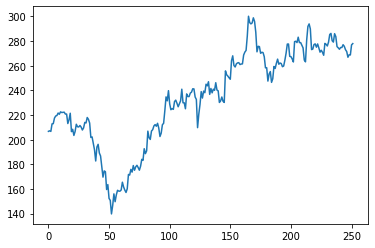

In [20]:
print(test_data.shape)
plt.plot(test_data)

In [21]:
unscaled_training_data = pd.read_csv('FB_train.csv')
unscaled_test_data = pd.read_csv('FB_test.csv')

In [22]:
all_data = pd.concat((unscaled_training_data['Open'], unscaled_test_data['Open']), axis = 0)
print(len(all_data))

1510


In [23]:
x_test_data = all_data[len(all_data) - len(test_data) - 40:].values
print(len(x_test_data))

292


In [24]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [25]:
x_test_data = scaler.transform(x_test_data)

In [26]:
final_x_test_data = []
for i in range(40, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i, 0])
final_x_test_data = np.array(final_x_test_data)

In [27]:
final_x_test_data = np.reshape(final_x_test_data, (final_x_test_data.shape[0], 
                                               final_x_test_data.shape[1], 
                                               1))

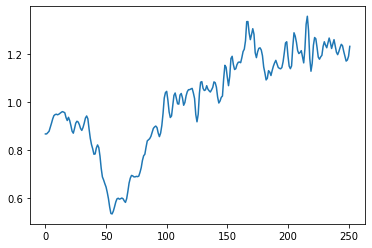

In [28]:
predictions = rnn.predict(final_x_test_data)
plt.plot(predictions)

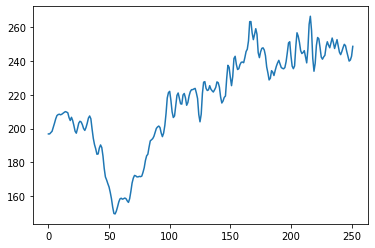

In [29]:
unscaled_predictions = scaler.inverse_transform(predictions)
plt.plot(unscaled_predictions)

Text(0.5, 1.0, 'Facebook Stock Price Predictions')

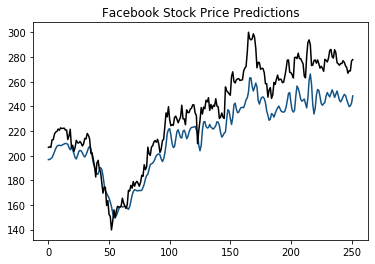

In [30]:
plt.plot(unscaled_predictions, color = '#135485', label = "Predictions")
plt.plot(test_data, color = 'black', label = "Real Data")
plt.title('Facebook Stock Price Predictions')